<a href="https://colab.research.google.com/github/davidholcer/All-The-News-Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on Newspaper Articles

Sentiment Analysis...

## 1. Importing Libraries and Data

In [81]:
import numpy as np 
import pandas as pd 
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Importing file from local drive.

In [82]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

Converting csv to dataframe

In [0]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['articles1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [172]:
df1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [0]:

df1.iloc[i,9]


In [185]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

16.0
12.0


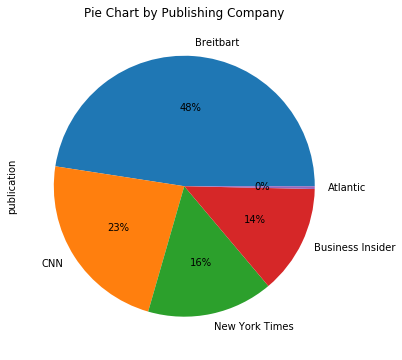

In [189]:
df1.publication.value_counts().plot(kind='pie', autopct='%1.0f%%',title='Pie Chart by Publishing Company')

In [87]:
pip install --upgrade "ibm-watson>=4.0.1"

Requirement already up-to-date: ibm-watson>=4.0.1 in /usr/local/lib/python3.6/dist-packages (4.0.1)


In [0]:
#import ibm_watson
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import *
from io import StringIO 
import json

In [0]:
def perform_emotion_analysis(input_text):
  authenticator = IAMAuthenticator('-gYe7vGCYYrsDYeb0U7C50hikjsy4wrJzsNwD22a472g')
  natural_language_understanding = NaturalLanguageUnderstandingV1(
      version='2019-10-21',
      authenticator=authenticator
  )

  natural_language_understanding.set_service_url('https://gateway.watsonplatform.net/natural-language-understanding/api')
  
  #print (features)
  response = natural_language_understanding.analyze(text=input_text,features=Features(
      emotion=EmotionOptions(document=True)
      )).get_result()
        #gets top n (limit) entities
        #entities=EntitiesOptions(emotion=True, sentiment=True, limit=2),
        #gets top n (limit) # of keywords
        #keywords=KeywordsOptions(emotion=True, sentiment=True,
         #                        limit=2)
        
        
                                 
                                 #features=Features(emotion=EmotionOptions(targets=['Republicans','Obama']))).get_result()

  return(json.dumps(response, indent=2))

In [0]:
def perform_category_analysis(input_text):
  authenticator = IAMAuthenticator('-gYe7vGCYYrsDYeb0U7C50hikjsy4wrJzsNwD22a472g')
  natural_language_understanding = NaturalLanguageUnderstandingV1(
      version='2019-10-21',
      authenticator=authenticator
  )

  natural_language_understanding.set_service_url('https://gateway.watsonplatform.net/natural-language-understanding/api')
  
  #print (features)
  response = natural_language_understanding.analyze(text=input_text,features=Features(
        categories=CategoriesOptions(limit=3))).get_result()
                                 
                                 #features=Features(emotion=EmotionOptions(targets=['Republicans','Obama']))).get_result()

  return(json.dumps(response, indent=2))

In [0]:
emotion_0=perform_emotion_analysis(df1.content[0])

In [100]:
perform_category_analysis(df1.content[3])

'{\n  "usage": {\n    "text_units": 2,\n    "text_characters": 12274,\n    "features": 1\n  },\n  "language": "en",\n  "categories": [\n    {\n      "score": 0.781938,\n      "label": "/society/unrest and war"\n    },\n    {\n      "score": 0.733197,\n      "label": "/art and entertainment/shows and events"\n    },\n    {\n      "score": 0.645251,\n      "label": "/art and entertainment/movies"\n    }\n  ]\n}'

In [0]:
def visualize_emotion_data(prod_emotion_data):
    """
    method that takes in emotion data and generates a pei chart that represnts the count of each emotion.
    IBM provides data for 5 types of emotions: Joy, Anger, Disgust, Sadness, and fear
    :param prod_emotion_data:
    :return:
    """
    #string parsing
    #em=prod_emotion_data.replace("\n", "")
    decoded=json.JSONDecoder().decode(prod_emotion_data)['emotion']['document']['emotion']

    # define chart properties
    labels = tuple(decoded.keys())
    sizes = list(decoded.values())
    # initialize the chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [0]:
em0=emotion_0.replace("\n", "")

In [139]:
em0

'{  "usage": {    "text_units": 1,    "text_characters": 5607,    "features": 1  },  "language": "en",  "emotion": {    "document": {      "emotion": {        "sadness": 0.561928,        "joy": 0.1693,        "fear": 0.119144,        "disgust": 0.506031,        "anger": 0.179711      }    }  }}'

In [151]:
json.JSONDecoder().decode(emotion_0)['emotion']['document']['emotion'].values()

dict_values([0.561928, 0.1693, 0.119144, 0.506031, 0.179711])

In [152]:
emotion_0

'{\n  "usage": {\n    "text_units": 1,\n    "text_characters": 5607,\n    "features": 1\n  },\n  "language": "en",\n  "emotion": {\n    "document": {\n      "emotion": {\n        "sadness": 0.561928,\n        "joy": 0.1693,\n        "fear": 0.119144,\n        "disgust": 0.506031,\n        "anger": 0.179711\n      }\n    }\n  }\n}'

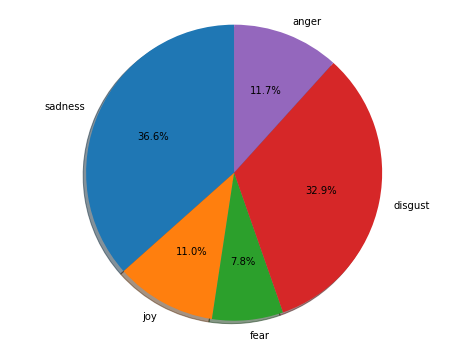

In [154]:
visualize_emotion_data(emotion_0)